 **Project Goal:Predict wastage amount based on food ingredients, meals served, total customers, event type, and month.**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from xgboost import XGBRegressor
import warnings
warnings.filterwarnings("ignore")

In [2]:
#load dataset
df=pd.read_csv('C:/classisificatn and regressin/jkuat_wastedata.csv')

In [3]:
df.head(10)

,Meat(kgs),Cereals(kgs),Rice(kgs),Maize/F(kgs),Wheat/F(kgs),Eggs(kgs),Vegetables(kgs),Milk(litres),Fruits(kgs),B/F,Lunch,supper,Total Customers,Event Type,month,Food cooked,Food Consumed,wastage amount
0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,Regular,January,0.0,0,0.0
1,0.0,0,0,0,0,0,0,0,0,0,0,0,0,Regular,January,0.0,0,0.0
2,1.5,20,35,25,25,5,105,5,0,33,32,25,90,Regular,January,221.5,90,131.5
3,1.5,20,35,25,25,5,105,5,0,38,27,26,91,Regular,January,221.5,91,130.5
4,1.5,20,35,25,25,5,105,5,0,29,28,23,80,Regular,January,221.5,80,141.5
5,2.5,30,35,25,35,5,105,10,0,33,57,42,132,Regular,January,247.5,132,115.5
6,3.0,40,65,40,35,8,105,10,0,25,86,65,176,Regular,January,306.0,176,130.0
7,3.0,40,65,60,35,8,135,10,0,26,73,41,140,Regular,January,356.0,140,216.0
8,3.0,40,65,60,35,8,135,10,0,23,66,54,143,Regular,January,356.0,143,213.0
9,3.0,40,65,60,35,8,135,10,0,32,75,82,189,Regular,January,356.0,189,167.0


In [4]:
df.shape

(365, 18)

In [5]:
df.info(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Meat(kgs)        365 non-null    float64
 1   Cereals(kgs)     365 non-null    int64  
 2   Rice(kgs)        365 non-null    int64  
 3   Maize/F(kgs)     365 non-null    int64  
 4   Wheat/F(kgs)     365 non-null    int64  
 5   Eggs(kgs)        365 non-null    int64  
 6   Vegetables(kgs)  365 non-null    int64  
 7   Milk(litres)     365 non-null    int64  
 8   Fruits(kgs)      365 non-null    int64  
 9   B/F              365 non-null    int64  
 10  Lunch            365 non-null    int64  
 11  supper           365 non-null    int64  
 12  Total Customers  365 non-null    int64  
 13  Event Type       365 non-null    object 
 14  month            365 non-null    object 
 15  Food cooked      365 non-null    float64
 16  Food Consumed    365 non-null    int64  
 17  wastage amount  

**check missing values**

In [6]:
df.isnull().sum()

Meat(kgs)          0
Cereals(kgs)       0
Rice(kgs)          0
Maize/F(kgs)       0
Wheat/F(kgs)       0
Eggs(kgs)          0
Vegetables(kgs)    0
Milk(litres)       0
Fruits(kgs)        0
B/F                0
Lunch              0
supper             0
Total Customers    0
Event Type         0
month              0
Food cooked        0
Food Consumed      0
wastage amount     0
dtype: int64

**Data Preprocessing**

In [7]:
print("Unique values in 'month':", df['month'].unique())
print("Unique values in 'Event Type':", df['Event Type'].unique())


Unique values in 'month': ['January' 'February' 'March' 'April' 'May' 'June' 'July' 'August'
 'September' 'October' 'November' 'December']
Unique values in 'Event Type': ['Regular' 'special' 'Special' 'Special ' 'Regular ']


**Handle Categorical Variables**

In [8]:
# It Converts to lowercase and remove extra spaces
df['month'] = df['month'].str.strip().str.lower()
df['Event Type'] = df['Event Type'].str.strip().str.lower()


In [9]:
month_mapping = {
    'january': 1, 'february': 2, 'march': 3, 'april': 4,
    'may': 5, 'june': 6, 'july': 7, 'august': 8,
    'september': 9, 'october': 10, 'november': 11, 'december': 12
}

event_type_mapping = {
    'regular': 0,
    'special': 1
}


df['month'] = df['month'].map(month_mapping)
df['Event Type'] = df['Event Type'].map(event_type_mapping)


In [10]:
df.head(-10)

,Meat(kgs),Cereals(kgs),Rice(kgs),Maize/F(kgs),Wheat/F(kgs),Eggs(kgs),Vegetables(kgs),Milk(litres),Fruits(kgs),B/F,Lunch,supper,Total Customers,Event Type,month,Food cooked,Food Consumed,wastage amount
0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0.0,0,0.0
1,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0.0,0,0.0
2,1.5,20,35,25,25,5,105,5,0,33,32,25,90,0,1,221.5,90,131.5
3,1.5,20,35,25,25,5,105,5,0,38,27,26,91,0,1,221.5,91,130.5
4,1.5,20,35,25,25,5,105,5,0,29,28,23,80,0,1,221.5,80,141.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
350,3.0,40,65,60,35,8,195,10,0,31,84,165,280,0,12,416.0,280,136.0
351,3.0,40,65,60,35,8,195,10,0,26,71,180,277,0,12,416.0,277,139.0
352,3.0,40,65,60,35,8,195,10,0,29,83,198,310,0,12,416.0,310,106.0
353,3.0,40,65,60,35,8,195,10,0,33,80,148,261,0,12,416.0,261,155.0


**Split the Data into Training and Testing Sets**

In [11]:
# Define features and target
X = df.drop(columns=['wastage amount'])
y = df['wastage amount']

In [12]:
# Split the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42)

In [13]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=200, max_depth=10,random_state=42)
rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=10, n_estimators=200, random_state=42)

In [14]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Predict
y_pred = rf.predict(X_test)

# Evaluate
print("Random Forest Evaluation")
print("R² Score:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))


Random Forest Evaluation
R² Score: 0.9750736755397414
MAE: 2.0753302012585855
MSE: 30.709320607278105


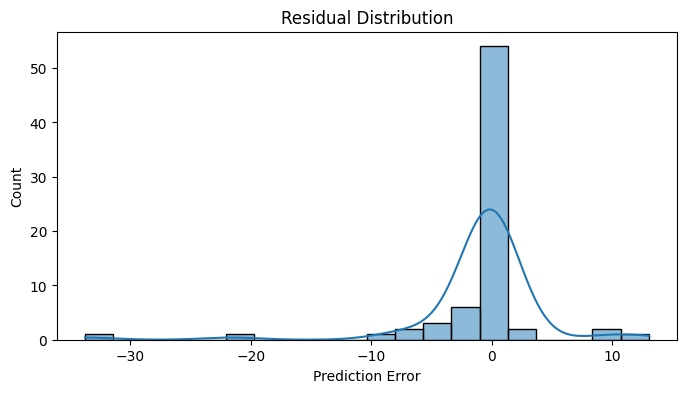

In [15]:
import matplotlib.pyplot as plt

residuals = y_test - y_pred
plt.figure(figsize=(8, 4))
sns.histplot(residuals, bins=20, kde=True)
plt.title("Residual Distribution")
plt.xlabel("Prediction Error")
plt.show()


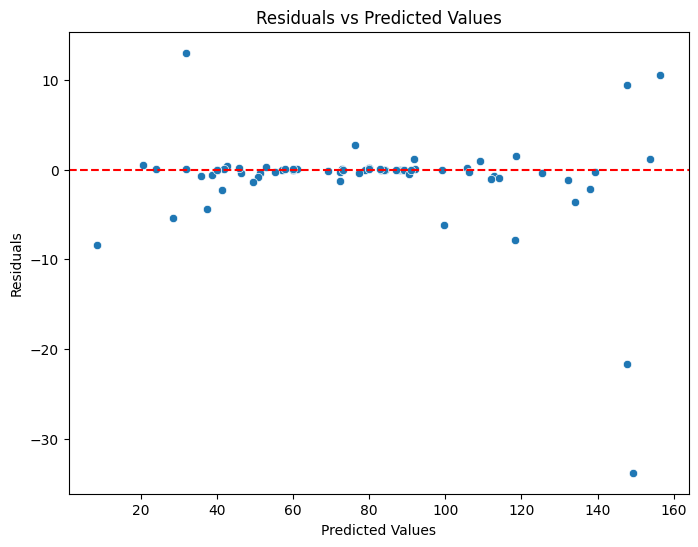

In [16]:
# Scatter plot of residuals vs. predicted values
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals vs Predicted Values')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

**Hyperparameter Tuning**

In [17]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],# Number of trees in the forest
    'max_depth': [None, 10, 20, 30],  # Maximum depth of each tree
    'min_samples_split': [2, 5, 10], # Minimum samples needed to split a node
    'min_samples_leaf': [1, 2, 4] # Minimum samples needed at a leaf node
}
rf = RandomForestRegressor(random_state=42)

# Grid Search
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, scoring='r2', verbose=2)
grid_search.fit(X_train, y_train)

# Best parameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_
print(f"Best Parameters: {best_params}")


Fitting 3 folds for each of 108 candidates, totalling 324 fits
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.5s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.5s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.6s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   0.7s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   0.8s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   0.8s
[CV] END m

**Retrain the model**

In [18]:
optimized_rf = RandomForestRegressor(
    max_depth=30,
    min_samples_leaf=1,
    min_samples_split=3,
    n_estimators=250,
    random_state=42
)
optimized_rf.fit(X_train, y_train)


RandomForestRegressor(max_depth=30, min_samples_split=3, n_estimators=250,
                      random_state=42)

In [19]:
y_pred_optimized = optimized_rf.predict(X_test)

# Metrics
from sklearn.metrics import mean_squared_error, r2_score
mse_optimized = mean_squared_error(y_test, y_pred_optimized)
r2_optimized = r2_score(y_test, y_pred_optimized)
print(f"Optimized MSE: {mse_optimized}")
print(f"Optimized R² Score: {r2_optimized}")

Optimized MSE: 27.92909631513707
Optimized R² Score: 0.9773303445707644


**Actual vs Predicted Wastage Food Amount**

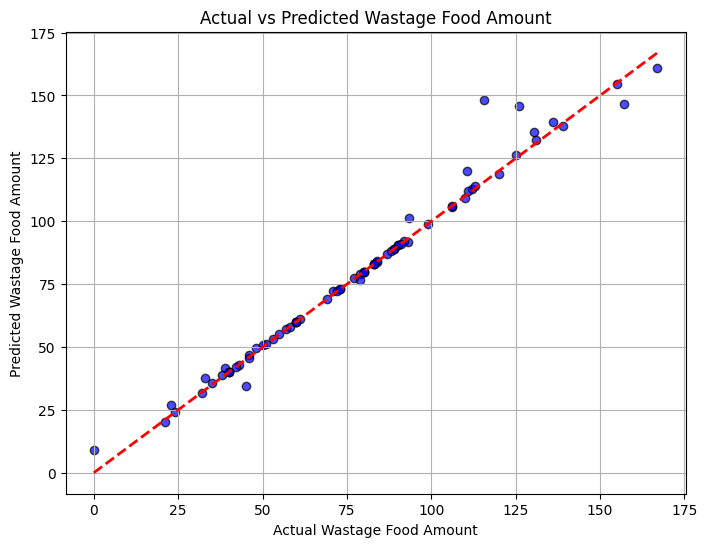

In [20]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_optimized, color='blue', edgecolor='k', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)  # Line y = x
plt.xlabel('Actual Wastage Food Amount')
plt.ylabel('Predicted Wastage Food Amount')
plt.title('Actual vs Predicted Wastage Food Amount')
plt.grid(True)
plt.show()


**Evaluate Feature Importance**

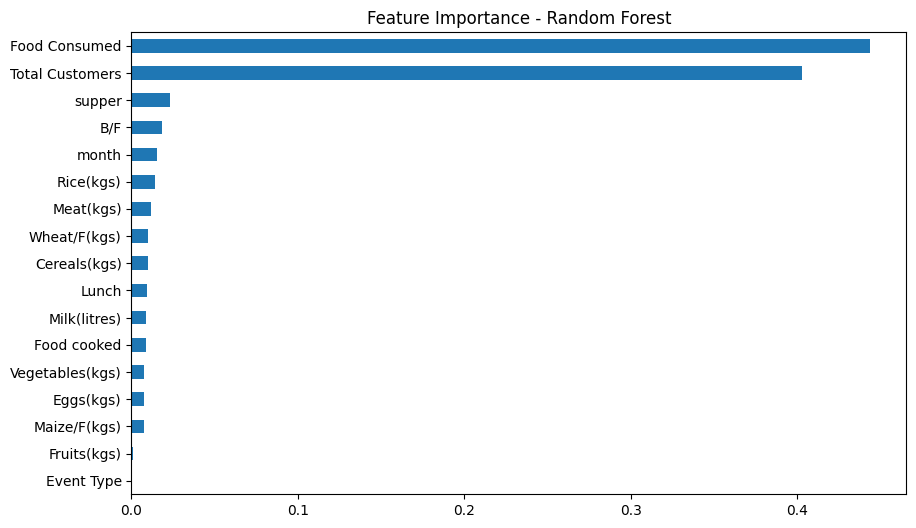

In [21]:
importances = pd.Series(optimized_rf.feature_importances_, index=X.columns)
importances.sort_values().plot(kind='barh', figsize=(10, 6))
plt.title('Feature Importance - Random Forest')
plt.show()


In [22]:
# Select top important features
important_features = importances[importances > 0.005].index
X_train_imp = X_train[important_features]
X_test_imp = X_test[important_features]

rf_imp = RandomForestRegressor(random_state=42)
rf_imp.fit(X_train_imp, y_train)

# Predict and evaluate
y_pred_imp = rf_imp.predict(X_test_imp)
print("R² Score (Important Features):", r2_score(y_test, y_pred_imp))


R² Score (Important Features): 0.9744978905836965


**Feature engineering**

In [23]:
print(df.columns.tolist())


['Meat(kgs)', 'Cereals(kgs)', 'Rice(kgs)', 'Maize/F(kgs)', 'Wheat/F(kgs)', 'Eggs(kgs)', 'Vegetables(kgs)', 'Milk(litres)', 'Fruits(kgs)', 'B/F', 'Lunch', 'supper', 'Total Customers', 'Event Type', 'month', 'Food cooked', 'Food Consumed', 'wastage amount']


In [24]:
# High importance interactions
df['FoodConsumed_TotalCustomers'] = df['Food Consumed'] * df['Total Customers']
df['FoodConsumed_Supper'] = df['Food Consumed'] * df['supper']
df['TotalCustomers_Supper'] = df['Total Customers'] * df['supper']
df['FoodConsumed_Breakfast'] = df['Food Consumed'] * df['B/F']  # Fixed this line

# Medium importance interactions
df['TotalCustomers_Month'] = df['Total Customers'] * df['month']
df['Rice_Meat'] = df['Rice(kgs)'] * df['Meat(kgs)']
df['Wheat_Cereals'] = df['Wheat/F(kgs)'] * df['Cereals(kgs)']
df['Lunch_Milk'] = df['Lunch'] * df['Milk(litres)']
df['FoodCooked_Vegetables'] = df['Food cooked'] * df['Vegetables(kgs)']

# Lower importance interactions
df['Eggs_Maize'] = df['Eggs(kgs)'] * df['Maize/F(kgs)']
df['Fruits_EventType'] = df['Fruits(kgs)'] * df['Event Type']


**Retrain the Model with New Interaction Features**

In [25]:
rf_interaction = RandomForestRegressor(
    n_estimators=250,
    max_depth=30,
    min_samples_split=3,
    min_samples_leaf=1,
    random_state=42
)

rf_interaction.fit(X_train, y_train)

RandomForestRegressor(max_depth=30, min_samples_split=3, n_estimators=250,
                      random_state=42)

In [26]:
y_pred_interaction = rf_interaction.predict(X_test)

mse_interaction = mean_squared_error(y_test, y_pred_interaction)
r2_interaction = r2_score(y_test, y_pred_interaction)

print(f"Retrained Model MSE (with interaction features): {mse_interaction:.4f}")
print(f"Retrained Model R² Score (with interaction features): {r2_interaction:.4f}")

Retrained Model MSE (with interaction features): 27.9291
Retrained Model R² Score (with interaction features): 0.9773


**Initialize the xgboost**

In [27]:
from xgboost import XGBRegressor

xgb = XGBRegressor(random_state=42)
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)
print("R² Score (XGBoost):", r2_score(y_test, y_pred_xgb))


R² Score (XGBoost): 0.9578834167230923


**XGBoost Training Using Only Important Features**

In [28]:
# Initialize and train XGBoost
xgb = XGBRegressor(random_state=42)
xgb.fit(X_train_imp, y_train)

# Predict and evaluate
y_pred_xgb = xgb.predict(X_test_imp)
print("R² Score (XGBoost with important features):", r2_score(y_test, y_pred_xgb))

R² Score (XGBoost with important features): 0.9575141384267304


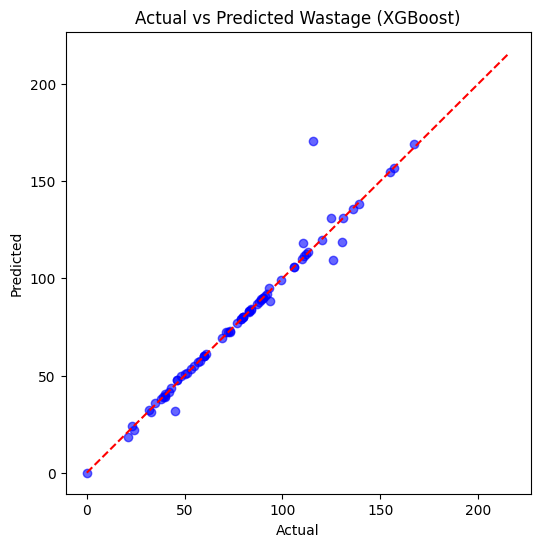

In [29]:
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred_xgb, alpha=0.6, color='blue')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted Wastage (XGBoost)")
plt.show()


**Analyze Outliers**

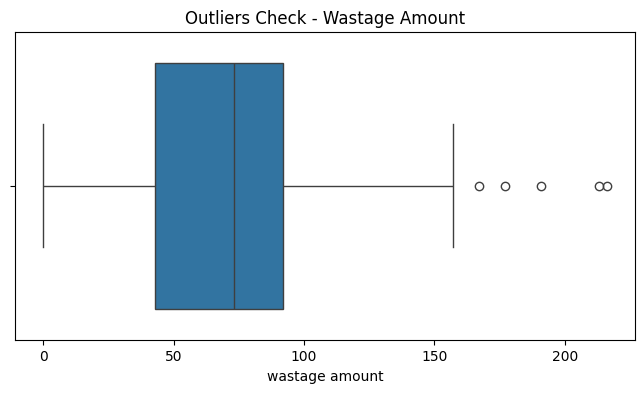

In [30]:
plt.figure(figsize=(8, 4))
sns.boxplot(x=df['wastage amount'])
plt.title('Outliers Check - Wastage Amount')
plt.show()


In [31]:
df['Predicted Wastage'] = optimized_rf.predict(X)
df[['wastage amount', 'Predicted Wastage']].head(-10)


,wastage amount,Predicted Wastage
0,0.0,8.875333
1,0.0,8.875333
2,131.5,139.242943
3,130.5,135.369967
4,141.5,142.730667
...,...,...
350,136.0,137.478843
351,139.0,139.166443
352,106.0,105.723267
353,155.0,152.267521


In [32]:
import joblib

# Save the trained model
joblib.dump(optimized_rf, "rf_model.pkl")

# Save the feature column names 
joblib.dump(X.columns.tolist(), "feature_columns.pkl")

# Save the mappings for categorical variables
joblib.dump(month_mapping, "month_mapping.pkl")
joblib.dump(event_type_mapping, "event_type_mapping.pkl")

print("Model, feature columns, and mappings saved successfully!")




Model, feature columns, and mappings saved successfully!
